Accuracy: 1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


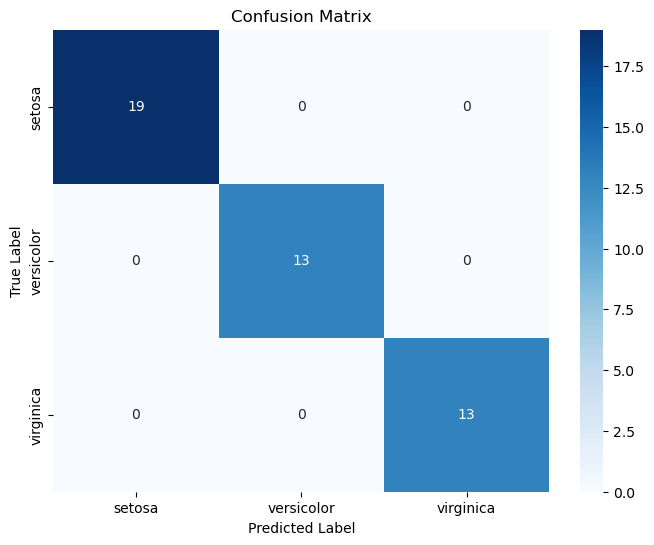

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


iris = datasets.load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

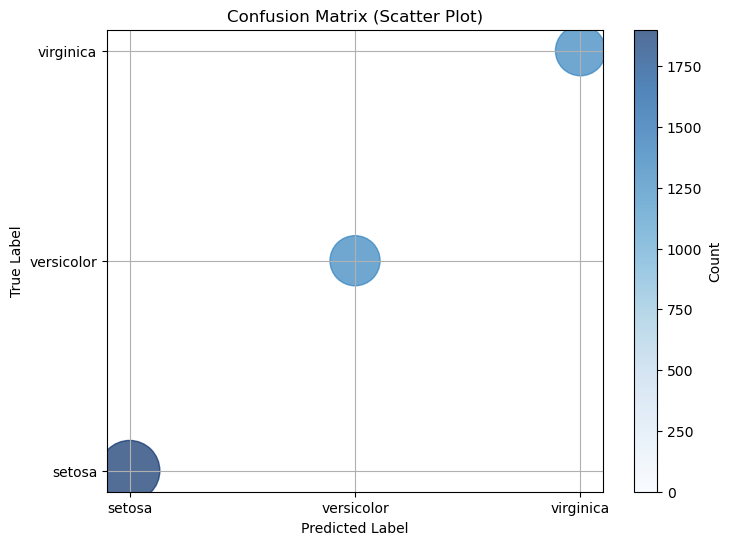

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get the coordinates for plotting
x_coords = []
y_coords = []
sizes = []

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        x_coords.append(j)
        y_coords.append(i)
        sizes.append(conf_matrix[i, j] * 100)

# Plot confusion matrix as scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, s=sizes, c=sizes, cmap='Blues', alpha=0.7)
plt.xticks(ticks=np.arange(3), labels=iris.target_names)
plt.yticks(ticks=np.arange(3), labels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Scatter Plot)')
plt.colorbar(label='Count')
plt.grid(True)
plt.show()